In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from NeuralFlow.flow import Flow, Flow_v2

In [2]:
def create_base_model(input_shape=1, output_shape=1):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='tanh')(x)
    return tf.keras.Model(inputs, outputs)


In [ ]:
flow = Flow_v2(
    model_fn = create_base_model,
    n_models = 3,
    noise_stddev=.1, 
    lam = 1e0)

In [4]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

flow.compile(optimizer_fn=lambda :tf.keras.optimizers.Adam(1e-3), loss_fn=loss_fn, metrics=['mae'])

In [5]:
X_train = tf.cast(np.linspace(0, 1, 1000).reshape(-1, 1), tf.float32)
y_train = tf.cast(np.sin(X_train * 2 * np.pi).reshape(-1, 1), tf.float32)

batch_size = 32
loader_size = X_train.shape[0] // batch_size

In [6]:
flow.fit(X_train, y_train, batch_size=batch_size, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2030 - mae: 0.5546   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.1156 - mae: 0.3947
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0682 - mae: 0.2940 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0527 - mae: 0.2506
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0429 - mae: 0.2185
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1721 - mae: 0.4301 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.0601 - mae: 0.2208
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0493 - mae: 0.2282
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.1115 - mae: 0.3643
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0803 - mae: 0.2923
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2860 - mae: 0.5377
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0576 - mae: 0.2271
Epoch 13/100
32/32 ━

In [7]:
est = flow.get_estimator("importance_sampling")

[[  -133164.64152083 -39885960.38487333 -53163719.87461931]
 [-39913967.54366521   -133148.92684966 -66425411.89876162]
 [-53182182.44604772 -66426322.75307959   -131342.80074213]]


[[-0.11471418 -0.13339172 -0.1138476 ]] [[-133164.64152083 -133148.92684966 -131342.80074213]]


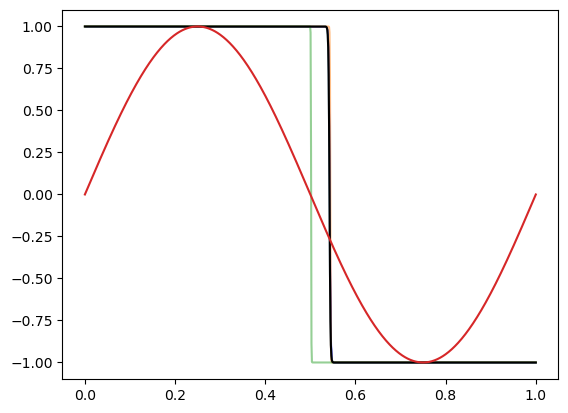

In [8]:
import matplotlib.pyplot as plt

print(est.logp, est.logq)
mean, var = est(X_train)

fig = plt.figure()

for model in flow.models:
    plt.plot(X_train, model(X_train), alpha=0.5)

plt.plot(X_train, mean.squeeze(), color='black')
plt.fill_between(tf.squeeze(X_train), mean.squeeze() - 1.96 * np.sqrt(var.squeeze()),  mean.squeeze() + 1.96 * np.sqrt(var.squeeze()), color='blue', alpha=0.5)


plt.plot(X_train, y_train)